# ITMAL Exercise

REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0208| CEF, minor text update.
2018-0305| CEF, updated with SHN comments.
2019-0902| CEF, updated for ITMAL v2.
2019-0904| CEF, updated and added conclusion Q.
2020-0125| CEF, F20 ITMAL update.
2020-0204| CEF, updated page numbers to HOMLv2.

## Implementing a dummy classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert at scale (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can resuse it later.

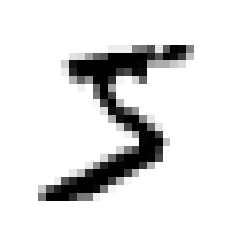

In [1]:
%matplotlib inline

from sklearn.datasets import fetch_openml

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    

def MNIST_GetDataSet():
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', return_X_y=True)  
    return X, y

X, y =MNIST_GetDataSet()

MNIST_PlotDigit(X[0])

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.88.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader...

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

#X, y = MNIST_GetDataSet()


print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
)

print(f"X_train.shape={X_train.shape}")
y_train_5 = (y_train == '5')  
y_test_5 = (y_test == '5')  
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

X.shape=(70000, 784)
X.shape=(70000, 784)
X_train.shape=(56000, 784)


SGDClassifier(random_state=42)

In [3]:
#Find true positive & false negatives 
import numpy as np

y_pred = sgd_clf.predict(X_test)


#Calcuating true positives & print them
y_pred_positive = np.where(y_pred == True)
y_test_positive = np.where(y_test == '5')
y_true_positive = y_pred_positive and y_test_positive 
y_true_positive = y_true_positive[0] # The first element of this array contains the indices with true positives
print(y_true_positive) 

#Calcuating fales negatives & print them
y_pred_negative = np.where(y_pred == False)
y_test_negative = np.where(y_test != '5')
y_false_negative = np.setdiff1d(y_pred_negative, y_test_negative)

print(y_false_negative) 

[    2    21    57 ... 13977 13986 13990]
[    2    21    57    78   109   119   169   192   265   285   315   339
   375   477   488   513   520   563   577   579   602   626   628   760
   836   967  1058  1063  1070  1088  1109  1118  1168  1278  1282  1302
  1330  1345  1359  1406  1427  1492  1503  1516  1533  1534  1537  1558
  1584  1645  1657  1694  1753  1779  1901  1918  1985  2061  2086  2094
  2105  2112  2140  2146  2155  2163  2198  2206  2244  2281  2283  2295
  2306  2349  2389  2440  2443  2487  2572  2640  2646  2665  2707  2733
  2747  2763  2784  2806  2812  2853  2903  2963  3011  3058  3064  3104
  3132  3140  3264  3284  3302  3423  3430  3448  3572  3637  3723  3769
  3793  3816  3844  3884  4048  4076  4144  4180  4195  4228  4241  4302
  4313  4345  4367  4373  4467  4535  4578  4613  4634  4680  4708  4742
  4764  4804  4809  4819  4855  4874  5024  5073  5074  5096  5106  5113
  5142  5224  5305  5335  5379  5402  5449  5461  5496  5524  5549  5563
  5639  5

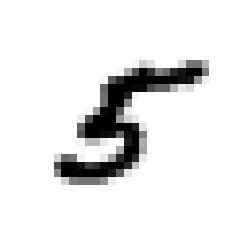

In [4]:
#We can now plot misclassified numbers
#True positive number
MNIST_PlotDigit(X_test[y_true_positive[0]])

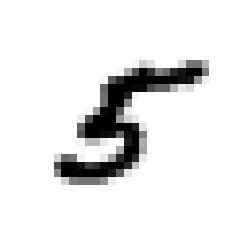

In [5]:
#False negative number
MNIST_PlotDigit(X_test[y_false_negative[0]])

#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found in [HOML], p.90, but name you estimator `DummyClassifier` instead of `Never5Classifyer`.

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/F20_itmal/L02/Figs/class_base_estimator.png" style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.89. Are they comparable? 

In [6]:
from sklearn.base import BaseEstimator
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    def get_params():
        pass

dummy_clf = DummyClassifier()
dummy_clf.fit(X, y_train_5)

In [7]:
from sklearn.metrics import accuracy_score
y_pred = dummy_clf.predict(X_test)

score = accuracy_score(y_test_5,y_pred)

print(y_test_5)

print(score)
# The accuracy is very similar because we are always guessing that a number is never a 5, 
# therefore about 90% of the time we are correct.

[False False  True ... False False False]
0.907


### Qd Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [8]:
# We learn how to fetch a dataset using scikitlearn. We use this MNIST dataset to learn how to do a binary classification
# with a stochastic descent gradient model. We then learn how to split a dataset in python into a training & test set, which 
# can use to train our model. 
# After training our model we can find various parameters to judge our model, and we find that even though we may have a lot
# of true positive (Correct classification of the number 5) it does not necessarily mean our model is good. We need to hold 
# compare the amount of true positive to true negative, false positive and negative to get an accurate idea of whether our 
# model is useful for classifying our data.